In [28]:
from PIL import Image

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
from datasets import load_dataset, load_from_disk

In [29]:
from nltk.corpus import stopwords

def remove_stopwords(text):
        text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
        return text

In [30]:
dataset = load_dataset("parquet", data_files={'train': 'train-00000-of-00001-04d26c1824941bbe.parquet'})

In [31]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'text'],
        num_rows: 47192
    })
})

In [32]:
dataset["train"][0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=64x64>,
 'text': 'animation,camera with flash'}

In [33]:
dataset = dataset["train"]

In [34]:
def split_text(data):
    splitdata = data.split(',')
    company.append(remove_stopwords(splitdata[0]))
    content.append(remove_stopwords(splitdata[1]))
    description.append(remove_stopwords((''.join(splitdata[2:])).strip()))
    textwithoutcompany.append(remove_stopwords((''.join(splitdata[1:])).strip()))
    futext.append(remove_stopwords(data.replace(',',' ')))
    return 

In [35]:
company = []
content = []
description = []
text = []
textwithoutcompany = []
for data in dataset["text"]:
    splitdata = data.split(',')
    company.append(remove_stopwords(splitdata[0]))
    content.append(remove_stopwords(splitdata[1]))
    description.append(remove_stopwords((''.join(splitdata[2:])).strip()))
    textwithoutcompany.append(remove_stopwords((''.join(splitdata[1:])).strip()))
    text.append(remove_stopwords(data.replace(',',' ')))

In [36]:
len(company),len(content),len(description),len(textwithoutcompany),len(text)

(47192, 47192, 47192, 47192, 47192)

In [37]:
dataset = dataset.add_column("company", company)
dataset = dataset.add_column("content", content)
dataset = dataset.add_column("description", description)
dataset = dataset.add_column("textwithoutcompany", textwithoutcompany)
dataset = dataset.add_column("fulltext", text)

In [38]:
dataset = dataset.remove_columns("text")

In [39]:
dataset

Dataset({
    features: ['image', 'company', 'content', 'description', 'textwithoutcompany', 'fulltext'],
    num_rows: 47192
})

In [ ]:
dataset = dataset.train_test_split(test_size=0.3)

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'company', 'content', 'description', 'textwithoutcompany', 'fulltext'],
        num_rows: 33034
    })
    test: Dataset({
        features: ['image', 'company', 'content', 'description', 'textwithoutcompany', 'fulltext'],
        num_rows: 14158
    })
})

In [ ]:
dataset["train"]

Dataset({
    features: ['image', 'company', 'content', 'description', 'textwithoutcompany', 'fulltext'],
    num_rows: 33034
})

In [ ]:
dataset["train"][0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=64x64>,
 'company': 'twitter',
 'content': 'woman biking',
 'description': 'medium-dark skin tone',
 'textwithoutcompany': 'woman biking medium-dark skin tone',
 'fulltext': 'twitter woman biking medium-dark skin tone'}

In [ ]:
nrows = dataset["train"].num_rows
print(nrows)

33034


In [ ]:
ncols = dataset["train"].num_columns
print(ncols)

6


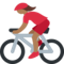

In [ ]:
dataset["train"][0]["image"]

In [ ]:
dataset["train"][0]["company"],dataset["train"][0]["content"],dataset["train"][0]["description"],dataset["train"][0]["fulltext"]

('twitter',
 'woman biking',
 'medium-dark skin tone',
 'twitter woman biking medium-dark skin tone')

In [ ]:
dataset["train"][0]["textwithoutcompany"]

'woman biking medium-dark skin tone'

In [ ]:
phrase = {
    'medium skin tone' : 'medium-skin-tone',
    'light skin tone' : 'light-skin-tone',
    'dark skin tone' : 'dark-skin-tone',
    'blond hair' : 'blond-hair',
    'white hair' : 'white-hair',
    'red hair' : 'red-hair',
    'curly hair' : 'curly-hair',
}

In [ ]:
traintextwithoutcompanycombined = []
for text in dataset["train"]["textwithoutcompany"]:
    for key, value in phrase.items():
        text = text.replace(key, value)
    traintextwithoutcompanycombined.append(text)
testtextwithoutcompanycombined = []
for text in dataset["test"]["textwithoutcompany"]:
    for key, value in phrase.items():
        text = text.replace(key, value)
    testtextwithoutcompanycombined.append(text)

In [ ]:
dataset['train'] = dataset['train'].add_column("textwithoutcompanycombined", traintextwithoutcompanycombined)
dataset['test'] = dataset['test'].add_column("textwithoutcompanycombined", testtextwithoutcompanycombined)

Flattening the indices:   0%|          | 0/33034 [00:00<?, ? examples/s]

Flattening the indices:   0%|          | 0/14158 [00:00<?, ? examples/s]

In [ ]:
df_company = pd.DataFrame(dataset["train"]["company"])
df_content = pd.DataFrame(dataset["train"]["content"])
df_description = pd.DataFrame(dataset["train"]["description"])

In [27]:
df_company.value_counts().head(10)

twitter           2352
apple             2341
google            2335
samsung           2314
openmoji          2312
facebook          2311
whatsapp          2280
microsoft         2140
lg                2109
microsoftteams    2017
dtype: int64

In [28]:
df_content.value_counts().head(10)

flag                       1854
person                      312
woman                       305
man                         305
family                      225
woman man holding hands     220
men holding hands           196
women holding hands         190
people holding hands        179
keycap                      127
dtype: int64

In [29]:
df_description.value_counts().head(10)

                                         18903
medium-light skin tone                    2127
dark skin tone                            2126
medium skin tone                          2126
light skin tone                           2105
medium-dark skin tone                     2105
dark skin tone medium-light skin tone       37
blond hair                                  37
dark skin tone medium-dark skin tone        34
dark skin tone light skin tone              33
dtype: int64

In [30]:
def get_images(dataset,indexList,flag="train"):
    return dataset[flag][indexList]["image"]
def get_texts(index):
    return dataset[flag][indexList]["text"]

In [31]:
def show_image(dataset,index):
    n = len(index)
    f = plt.figure(n,(10,n/10))
    i = 1
    for image in get_images(dataset,index):
        f.add_subplot(int(n/10)+1, 10, i)
        i+=1
        plt.imshow(image)
    plt.show(block=True)

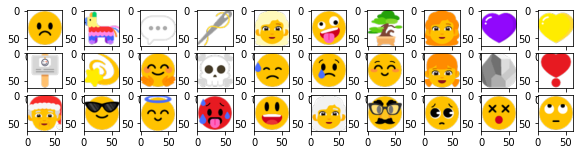

In [32]:
show_image(dataset,df_company[df_company[0]=="bubble"].index[:30])

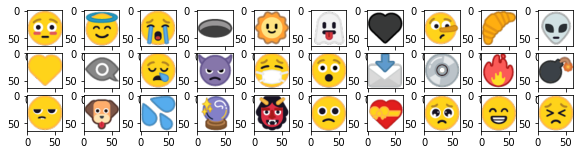

In [33]:
show_image(dataset,df_company[df_company[0]=="classic"].index[:30])

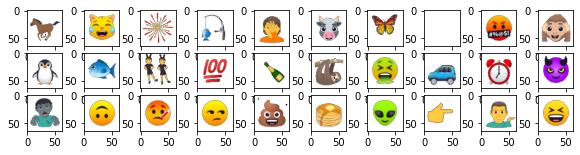

In [34]:
show_image(dataset,df_company[df_company[0]=="animation"].index[:30])

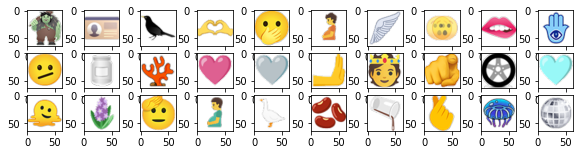

In [35]:
show_image(dataset,df_company[df_company[0]=="sample"].index[:30])

In [36]:
word_cloud1 = WordCloud(width = 2048, height = 1080).generate(" ".join(description for description in df_description[0]))

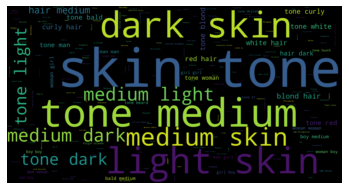

In [37]:
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


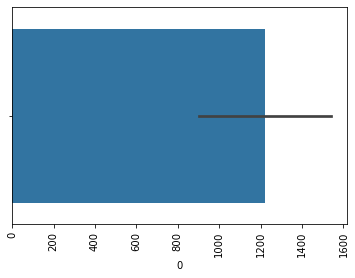

In [38]:
sns.barplot(df_company[0].value_counts())
plt.xticks(rotation=90)
plt.show()

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


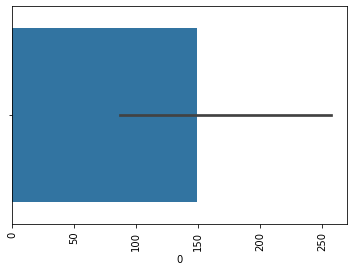

In [39]:
sns.barplot(df_content[0].value_counts().head(40))
plt.xticks(rotation=90)
plt.show()

In [40]:
dataset.save_to_disk("PreProcessedData3")

Saving the dataset (0/1 shards):   0%|          | 0/33034 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/14158 [00:00<?, ? examples/s]

In [41]:
reloaded_dataset = load_from_disk("PreProcessedData3")
reloaded_dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'company', 'content', 'description', 'textwithoutcompany', 'fulltext', 'textwithoutcompanycombined'],
        num_rows: 33034
    })
    test: Dataset({
        features: ['image', 'company', 'content', 'description', 'textwithoutcompany', 'fulltext', 'textwithoutcompanycombined'],
        num_rows: 14158
    })
})